# The problems with holdout sets


## Two samples
After building several classification models based on thetic_tac_toe dataset, you realize that some models do not generalize as well as others. You have created training and testing splits just as you have been taught, so you are curious why your validation process is not working.

After trying a different training, test split, you noticed differing accuracies for your machine learning model. Before getting too frustrated with the varying results, you have decided to see what else could be going on.

### init: 1 dataframe

In [1]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(tic_tac_toe)
tobedownloaded="{pandas.core.frame.DataFrame: {'tic_tac_toe.csv': 'https://file.io/MdFujs'}}"
prefix='data_from_datacamp/Chap1-Exercise3.3_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

In [2]:
import pandas as pd
tic_tac_toe=pd.read_csv(prefix+'tic_tac_toe.csv',index_col=0)

### code

In [3]:
# Create two different samples of 200 observations 
sample1 = tic_tac_toe.sample(200, random_state=1111)
sample2 = tic_tac_toe.sample(200, random_state=1171)

In [4]:
# Print the number of common observations 
print(len([index for index in sample1.index if index in sample2.index]))

40


In [6]:
# Print the number of observations in the Class column for both samples 
print(sample1['Class'].value_counts())
print(sample2['Class'].value_counts())


1    134
0     66
Name: Class, dtype: int64
1    123
0     77
Name: Class, dtype: int64


# Cross-validation

## scikit-learn's KFold()
You just finished running a colleagues code that creates a random forest model and calculates an out-of-sample accuracy. You noticed that your colleague's code did not have a random state, and the errors you found were completely different than the errors your colleague reported.

To get a better estimate for how accurate this random forest model will be on new data, you have decided to generate some indices to use for KFold cross-validation.

### init: 1 array

In [7]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X)
tobedownloaded="{numpy.ndarray: {'X.csv': 'https://file.io/53joGc'}}"
prefix='data_from_datacamp/Chap3-Exercise2.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{numpy.ndarray: {"X.csv": "https://file.io/53joGc"}}
{'numpy.ndarray': {'X.csv': 'https://file.io/53joGc'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  6497    0  6497    0     0   4997      0 --:--:--  0:00:01 --:--:--  4997


In [8]:
from uploadfromdatacamp import loadNDArrayFromCsv
X=loadNDArrayFromCsv(prefix+'X.csv', dtype='str')

### code

- Call the KFold() method to split data using five splits, shuffling, and a random state of 1111.
- Use the split() method of KFold on X.
- Print the number of indices in both the train and validation indices lists.

In [9]:
from sklearn.model_selection import KFold

# Use KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

# Create splits
splits = kf.split(X)

# Print the number of indices
for train_index, val_index in splits:
    print("Number of training indices: %s" % len(train_index))
    print("Number of validation indices: %s" % len(val_index))

Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17


## Using KFold indices
You have already created splits, which contains indices for the candy-data dataset to complete 5-fold cross-validation. To get a better estimate for how well a colleague's random forest model will perform on a new data, you want to run this model on the five different training and validation indices you just created.

In this exercise, you will use these indices to check the accuracy of this model using the five different splits. A for loop has been provided to assist with this process.

### code

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfc = RandomForestRegressor(n_estimators=25, random_state=1111)

# Access the training and validation indices of splits
for train_index, val_index in splits:
    # Setup the training and validation data
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
    # Fit the random forest model
    rfc.fit(X_train,y_train)
    # Make predictions, and print the accuracy
    predictions = rfc.predict(X_val)
    print("Split accuracy: " + str(mean_squared_error(y_val, predictions)))

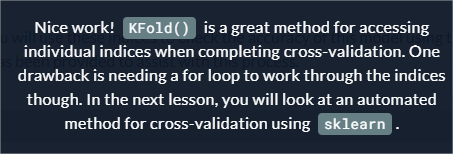

# sklearn's cross_val_score()


## scikit-learn's methods
You have decided to build a regression model to predict the number of new employees your company will successfully hire next month. You open up a new Python script to get started, but you quickly realize that sklearn has a lot of different modules. Let's make sure you understand the names of the modules, the methods, and which module contains which method.

Follow the instructions below to load in all of the necessary methods for completing cross-validation using sklearn. You will use modules:

- metrics
- model_selection
- ensemble

### code

In [11]:
# Instruction 1: Load the cross-validation method
from sklearn.model_selection import cross_val_score

# Instruction 2: Load the random forest regression model
from sklearn.ensemble import RandomForestRegressor

# Instruction 3: Load the mean squared error method
# Instruction 4: Load the function for creating a scorer
from sklearn.metrics import mean_squared_error, make_scorer

## Implement cross_val_score()
Your company has created several new candies to sell, but they are not sure if they should release all five of them. To predict the popularity of these new candies, you have been asked to build a regression model using the candy dataset. Remember that the response value is a head-to-head win-percentage against other candies.

Before you begin trying different regression models, you have decided to run cross-validation on a simple random forest model to get a baseline error to compare with any future results.

### init: 2 arrays

In [12]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X_train, y_train)
tobedownloaded="{numpy.ndarray: {'X_train.csv': 'https://file.io/cHceHl',\
  'y_train.csv': 'https://file.io/unl36p'}}"
prefix='data_from_datacamp/Chap3-Exercise3.2_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{numpy.ndarray: {"X_train.csv": "https://file.io/cHceHl",  "y_train.csv": "https://file.io/unl36p"}}
{'numpy.ndarray': {'X_train.csv': 'https://file.io/cHceHl', 'y_train.csv': 'https://file.io/unl36p'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6497    0  6497    0     0   6589      0 --:--:-- --:--:-- --:--:--  6595
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   992    0   992    0     0   3687      0 --:--:-- --:--:-- --:--:--  3701


In [13]:
from uploadfromdatacamp import loadNDArrayFromCsv
import pandas as pd
X_train=loadNDArrayFromCsv(prefix+'X_train.csv', dtype='float')
y_train=loadNDArrayFromCsv(prefix+'y_train.csv', dtype='float')


### code

- Fill in cross_val_score().

-- Use X_train for the training data, and y_train for the response.

-- Use rfc as the model, 10-fold cross-validation, and mse for the scoring function.
- Print the mean of the cv results.

In [14]:
rfc = RandomForestRegressor(n_estimators=25, random_state=1111)
mse = make_scorer(mean_squared_error)

# Set up cross_val_score
cv = cross_val_score(estimator=rfc,
                     X=X_train,
                     y=y_train,
                     cv=10,
                     scoring=mse)

# Print the mean error
print(cv.mean())

155.55845080026586


# Leave-one-out-cross-validation (LOOCV)


## When to use LOOCV
Which of the following are reasons you might NOT run LOOCV on the provided X dataset? The X data has been loaded for you to explore as you see fit.

A: The X dataset has 122,624 data points, which might be computationally expensive and slow.

B: You cannot run LOOCV on classification problems.

C: You want to test different values for 15 different parameters


### init: 1 dataframe

In [15]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X)
tobedownloaded="{pandas.core.frame.DataFrame: {'X.csv': 'https://file.io/xBO4ht'}}"
prefix='data_from_datacamp/Chap3-Exercise4.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"X.csv": "https://file.io/xBO4ht"}}
{'pandas.core.frame.DataFrame': {'X.csv': 'https://file.io/xBO4ht'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
100 1830k    0 1830k    0     0   450k      0 --:--:--  0:00:04 --:--:--  450k
100 4215k    0 4215k    0     0   832k      0 --:--:--  0:00:05 --:--:--  866k
100 6932k    0 6932k    0     0  1160k      0 --:--:--  0:00:05 --:--:-- 1498k


In [16]:
import pandas as pd
X=pd.read_csv(prefix+'X.csv',index_col=0)

### code

In [17]:
X.shape

(122624, 27)

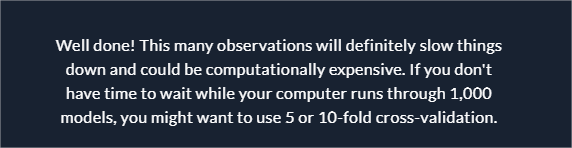

## Leave-one-out-cross-validation
Let's assume your favorite candy is not in the candy dataset, and that you are interested in the popularity of this candy. Using 5-fold cross-validation will train on only 80% of the data at a time. The candy dataset only has 85 rows though, and leaving out 20% of the data could hinder our model. However, using leave-one-out-cross-validation allows us to make the most out of our limited dataset and will give you the best estimate for your favorite candy's popularity!

In this exercise, you will use cross_val_score() to perform LOOCV.

### init

In [19]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X, y)
tobedownloaded="{numpy.ndarray: {'X.csv': 'https://file.io/aa6tqu',\
  'y.csv': 'https://file.io/LI9QwW'}}"
prefix='data_from_datacamp/Chap3-Exercise4.2_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{numpy.ndarray: {"X.csv": "https://file.io/aa6tqu",  "y.csv": "https://file.io/LI9QwW"}}
{'numpy.ndarray': {'X.csv': 'https://file.io/aa6tqu', 'y.csv': 'https://file.io/LI9QwW'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6497    0  6497    0     0  12235      0 --:--:-- --:--:-- --:--:-- 12258
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   992    0   992    0     0   1158      0 --:--:-- --:--:-- --:--:--  1160
100   992    0   992    0     0   1158      0 --:--:-- --:--:-- --:--:--  1160


In [20]:
from uploadfromdatacamp import loadNDArrayFromCsv
import pandas as pd
X=loadNDArrayFromCsv(prefix+'X.csv', dtype='float')
y=loadNDArrayFromCsv(prefix+'y.csv', dtype='float')

### code

In [22]:
from sklearn.metrics import mean_absolute_error, make_scorer

# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

rfr = RandomForestRegressor(n_estimators=15, random_state=1111)

# Implement LOOCV
scores = cross_val_score(rfr, X=X, y=y, cv=85, scoring=mae_scorer)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))

The mean of the errors is: 9.464989603398694.
The standard deviation of the errors is: 7.265762094853885.


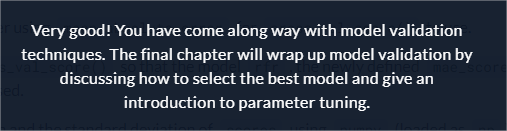